In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Importing a dataset
df = sns.load_dataset("iris")
# Splittinf the dataset into X and y (featuere and labels)
X = df[["sepal_length","sepal_width"]]
y = df["petal_width"]

# Training the model on the traindg set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
print("Intercept",model.intercept_)
print("Coefficients:",model.coef_)


Intercept -1.563492266306607
Coefficients: [ 0.723292   -0.47872132]


In [7]:
# Importing the neccessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error,r2_score

# Splitting the dataset into training and testing data
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

# Training the model on the training the dataset
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Calculating the MAE of our predictions
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
# Calculating the MAPE of our predictions 
mape = mean_absolute_percentage_error(y_test, y_pred)*100
print('Mean Absolute Percentage Error:', mape)
# Calculating the MSRE of our predictions
msre = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', msre)
# Calculating the R^2 score of our predictions
r2 = r2_score(y_test, y_pred)
print('R-Square Score:', r2)


Mean Absolute Error: 0.28441702771471866
Mean Absolute Percentage Error: 63.46773348732867
Mean Squared Error: 0.10675381717270811
R-Square Score: 0.8335663488869797


In [15]:
regressor.predict([[5,3.6]])

c:\Users\santosh\Desktop\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.36530039])

In [11]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,versicolor
4,5.0,3.6,1.4,0.2,setosa
62,6.0,2.2,4.0,1.0,versicolor
131,7.9,3.8,6.4,2.0,virginica
141,6.9,3.1,5.1,2.3,virginica
89,5.5,2.5,4.0,1.3,versicolor
9,4.9,3.1,1.5,0.1,setosa
75,6.6,3.0,4.4,1.4,versicolor
8,4.4,2.9,1.4,0.2,setosa
88,5.6,3.0,4.1,1.3,versicolor


In [17]:
print("Intercept",regressor.intercept_)
print("Coefficients",regressor.coef_)

Intercept -1.4914296656022563
Coefficients [ 0.70758577 -0.46699967]


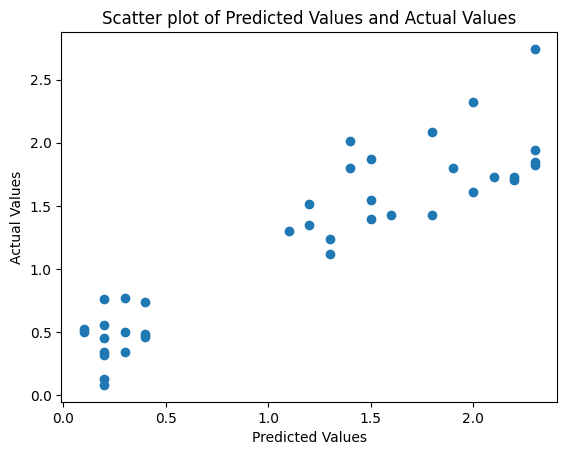

In [21]:
plt.scatter(y_test,y_pred)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Scatter plot of Predicted Values and Actual Values")
plt.show()

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [23]:
# Import Libraries
import os, sys
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv("50_Startups.csv")

In [25]:
len(df)

50

In [26]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
df.shape

(50, 5)

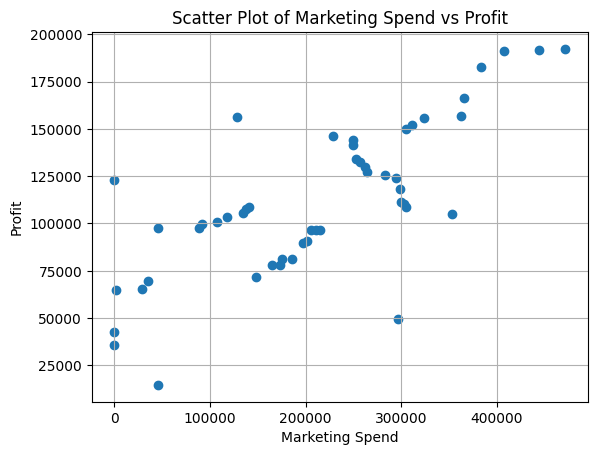

In [34]:
# Scatter plot
plt.scatter(df["Marketing Spend"],df["Profit"])
# Adding labels and title to the scatterplot
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Scatter Plot of Marketing Spend vs Profit")
plt.grid()

# Displaying the plot
plt.show()

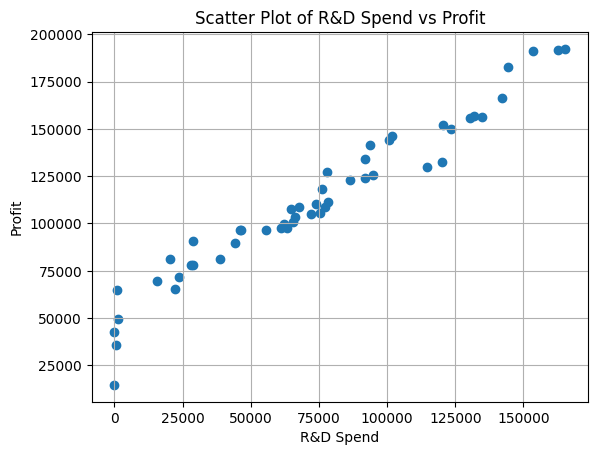

In [42]:
plt.scatter(df["R&D Spend"],df["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Scatter Plot of R&D Spend vs Profit")
plt.grid()
plt.show()


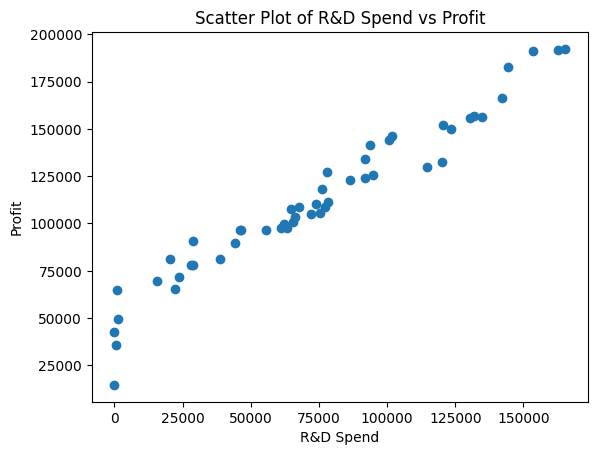

In [49]:
plt.scatter(x="R&D Spend",y="Profit",data=df)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Scatter Plot of R&D Spend vs Profit")

plt.show()


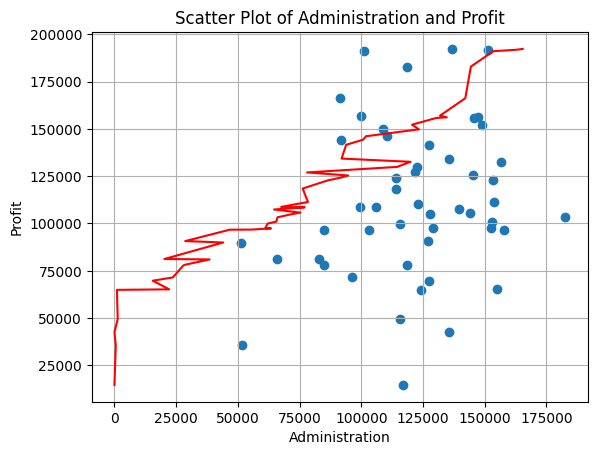

In [57]:
plt.scatter(df["Administration"],df["Profit"])
plt.plot(df["R&D Spend"],df["Profit"],color="red")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Scatter Plot of Administration and Profit")
plt.grid()
plt.show()

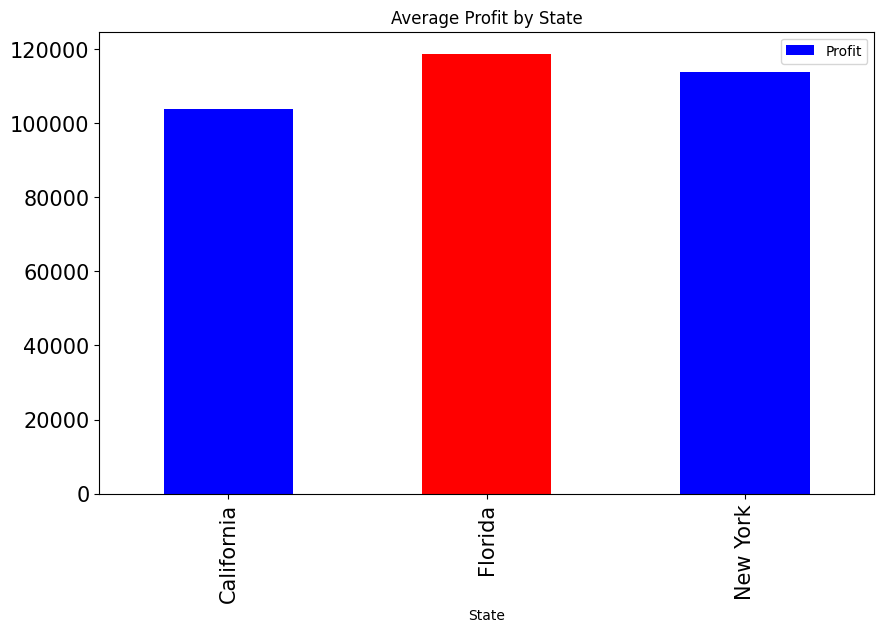

In [60]:
# Create the figure object
ax = df.groupby(["State"])["Profit"].mean().plot.bar(
  figsize=(10, 6), title="Average Profit by State", color=['blue', 'red'], fontsize=15,legend=True
)

In [64]:
df.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [65]:
# Create dummy variables for the categorical variable State
df["NewYork_State"] = np.where(df["State"]=="NewYork",1,0)
df["California_State"] = np.where(df["State"]=="California",1,0)
df["Florida_State"] = np.where(df["State"]=="Florida",1,0)

# Drop the original column state from the dataframe 
df.drop(columns=["State"],axis=1,inplace=True)

In [66]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,0,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [104]:
dependent_variable = "Profit"

In [105]:
# Create a list of independent variable
independent_variable = list(set(df.columns.tolist())-{dependent_variable})

In [106]:
independent_variable

['California_State',
 'Marketing Spend',
 'NewYork_State',
 'Administration',
 'Florida_State',
 'R&D Spend']

In [107]:
# Create the state of independent variable
X = df[independent_variable].values

# Create the dependent variable data
y = df[dependent_variable].values

In [108]:
df[independent_variable]

,California_State,Marketing Spend,NewYork_State,Administration,Florida_State,R&D Spend
0,0,471784.10,0,136897.80,0,165349.20
1,1,443898.53,0,151377.59,0,162597.70
2,0,407934.54,0,101145.55,1,153441.51
3,0,383199.62,0,118671.85,0,144372.41
4,0,366168.42,0,91391.77,1,142107.34
5,0,362861.36,0,99814.71,0,131876.90
6,1,127716.82,0,147198.87,0,134615.46
7,0,323876.68,0,145530.06,1,130298.13
8,0,311613.29,0,148718.95,0,120542.52
9,1,304981.62,0,108679.17,0,123334.88


In [109]:
df[dependent_variable]

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [110]:
# Splitting the dataset into the training set and test set
X_test,X_train,y_test,Y_train = train_test_split(X,y,test_size=0.2,random_state=42)


In [111]:
X_train[0:10]

array([[1.0000000e+00, 2.5266493e+05, 0.0000000e+00, 1.3549507e+05,
        0.0000000e+00, 9.1992390e+04],
       [1.0000000e+00, 1.7499930e+05, 0.0000000e+00, 8.2982090e+04,
        0.0000000e+00, 3.8558510e+04],
       [0.0000000e+00, 9.1131240e+04, 0.0000000e+00, 1.1564128e+05,
        1.0000000e+00, 6.1994480e+04],
       [0.0000000e+00, 1.9039300e+03, 0.0000000e+00, 1.2415304e+05,
        0.0000000e+00, 1.0002300e+03],
       [0.0000000e+00, 2.8257431e+05, 0.0000000e+00, 1.4507758e+05,
        0.0000000e+00, 9.4657160e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1743150e+04,
        0.0000000e+00, 5.4205000e+02],
       [0.0000000e+00, 1.3405007e+05, 0.0000000e+00, 1.4413598e+05,
        1.0000000e+00, 7.5328870e+04],
       [1.0000000e+00, 1.3796262e+05, 0.0000000e+00, 1.3955316e+05,
        0.0000000e+00, 6.4664710e+04],
       [1.0000000e+00, 4.6085250e+04, 0.0000000e+00, 1.2921961e+05,
        0.0000000e+00, 6.3408860e+04],
       [0.0000000e+00, 0.0000000e+00,

In [116]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
X_train[0:10]

array([[1.        , 0.89415393, 0.        , 0.82294517, 0.        ,
        0.97168606],
       [1.        , 0.61930364, 0.        , 0.30695338, 0.        ,
        0.40393578],
       [0.        , 0.32250363, 0.        , 0.62786211, 1.        ,
        0.65294967],
       [0.        , 0.0067378 , 0.        , 0.71149855, 0.        ,
        0.00486829],
       [0.        , 1.        , 0.        , 0.91710278, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.47438874, 0.        , 0.90785063, 1.        ,
        0.79463138],
       [1.        , 0.48823483, 0.        , 0.8628199 , 0.        ,
        0.68132163],
       [1.        , 0.16309073, 0.        , 0.76128259, 0.        ,
        0.66797786],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.91247463]])

In [122]:
regressor = LinearRegression()

In [123]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [10, 112]

In [120]:
regressor.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [118]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [10, 112]

In [115]:
print(X_train.shape)
print(y_train.shape)

(10, 6)
(112,)
